# PHAS0031:Computational Physics: Week 8: Assessment
## Joshua Giblin-Burnham(SN.:19052055)

### Introduction:
In this notebook we will explore the Ising model with Monte Carlo simulation. We wu=ill have a 2D lattice, representing spins at sites and we will randomly swap two spins based on the energy change due to such a swap and we will use Metropolis criterion to avoid local minima.

In [1]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 1. Set up the initial arrangements of spins
We Define a box length,`L`, and create variables `B_kT = 0.0` and `J_kT = 0.5` and Create an initial lattice of spins using the command:
`spins = (-1)**np.random.randint(0,2,size=(L,L))`


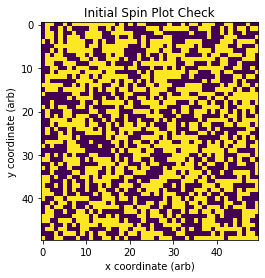

In [2]:
# Defining box dimension L and parameters B/kbT and J/kbT
L = 50 
B_kT = 0.0
J_kT = 0.5

# Initialise spins 
spins= (-1)**np.random.randint( 0, 2, size= (L,L) )

# Plot to check distribution
plot= plt.imshow(spins)
plt.xlabel('x coordinate (arb)')
plt.ylabel('y coordinate (arb)')
plt.title('Initial Spin Plot Check')
plt.show()

### 2. Calculate the energy
We wil use `np.roll` to create an array which holds the sum over all neighbouring spins for every spin on the lattice: `sum_neigh = np.roll(spins,1,axis=0) + ....` and evaluate the total energy using based on equations below.

- The total energy of any lattice arrangement is given as:

$$E=-\sum_{i,j}J s_i s_j - \sum_i Bms_i=-\sum_i s_i \left(mB + J \sum_j s_j \right)$$

In [3]:
# Calculate sum of neighbouring spins
Sn = np.roll(spins,1,axis=0) + np.roll(spins,-1,axis=0) + np.roll(spins,1,axis=1) + np.roll(spins,-1,axis=1) 

# Calculate total energy 
Et = -np.sum(spins*(B_kT + J_kT*Sn))

print("Starting energy is ",Et)

Starting energy is  56.0


### 3. Write the swap function
We define a function for swapping spins at two positions, they are swapped whe $\Delta E<0$, using the energy equation above the difference in energy states would be;

$$ \Delta E = E_{final}-E_{initial}$$

- When swapping two spins $i$ and $k$ we get
$$ \Delta E = \Bigg[-s_k \left(mB + J \sum_{j_i} s_{j_i} \right) - s_i \left(mB + J \sum_{j_k} s_{j_k} \right)\Bigg] - \Bigg[-s_i \left(mB + J \sum_{j_i} s_{j_i} \right)-s_k \left(mB + J \sum_{j_k} s_{j_k} \right) \Bigg] = \Bigg[s_k \left(mB + J \sum_{j_k} s_{j_k} \right)-s_k \left(mB + J \sum_{j_i} s_{j_i} \right)\Bigg]+ \Bigg[s_i \left(mB + J \sum_{j_i} s_{j_i} \right)- s_i \left(mB + J \sum_{j_k} s_{j_k} \right) \Bigg]$$
where $s_{j_i}$ and $s_{j_k}$ are the spins of neibouring particles of $i$ and $k$ respectively


- Simplifying we get:

$$ \Delta E = s_k J \left( \sum_{j_k} s_{j_k} - \sum_{j_i} s_{j_i} \right) + s_i J \left( \sum_{j_i} s_{j_i} - \sum_{j_k} s_{j_k} \right) $$

$$ \Delta E = s_k J \Delta S -  s_i J \Delta S = (s_k -  s_i ) J \Delta S $$
where $\Delta S= \left( \sum_{j_k} s_{j_k} - \sum_{j_i} s_{j_i} \right)$


In [5]:
def Swap(i1,j1,i2,j2):
    '''Update move for MC Ising model: Assumes that the 2D array spins is defined externally and changes this if the 
    Metropolis criterion is met.

    Inputs:
    i1, j1  Location 1 of spin to swap
    i2, j2  Location 2 of spin to swap
    
    Output:
    de      Change of energy'''
    
    # Using periodic boundary conditions we find the first positions neighbouring indexs
    i1_m = (i1-1)%L
    i1_p = (i1+1)%L
    j1_m = (j1-1)%L
    j1_p = (j1+1)%L
    
    # Sum of positions 1 neighbouring spins
    Sn1 =  spins[i1_m,j1]+ spins[i1,j1_m]+ spins[i1_p,j1]+ spins[i1,j1_p]
    
    # Using periodic boundary conditions we find the second positions neighbouring indexs
    i2_m = (i2-1)%L
    i2_p = (i2+1)%L
    j2_m = (j2-1)%L
    j2_p = (j2+1)%L
    
    # Sum of positions 2 neighbouring spins
    Sn2 =  spins[i2_m,j2]+ spins[i2,j2_m]+ spins[i2_p,j2]+ spins[i2,j2_p]
    
    # Difference in spins
    dS = Sn1 - Sn2
    
    # The change in energy accounts for swap of spins
    dE = J_kT*dS*(spins[i1,j1] - spins[i2,j2])
    
    # Metropolis criterion test
    p = np.exp(-dE)
    
    if dE < 0 or np.random.random()<p:
        # Swap spins
        s1 = spins[i1,j1] 
        s2 = spins[i2,j2]
        
        spins[i1,j1] = s2
        spins[i2,j2] = s1
    
    else:
        dE = 0.0
    
    return dE

### 4. Run the simulation

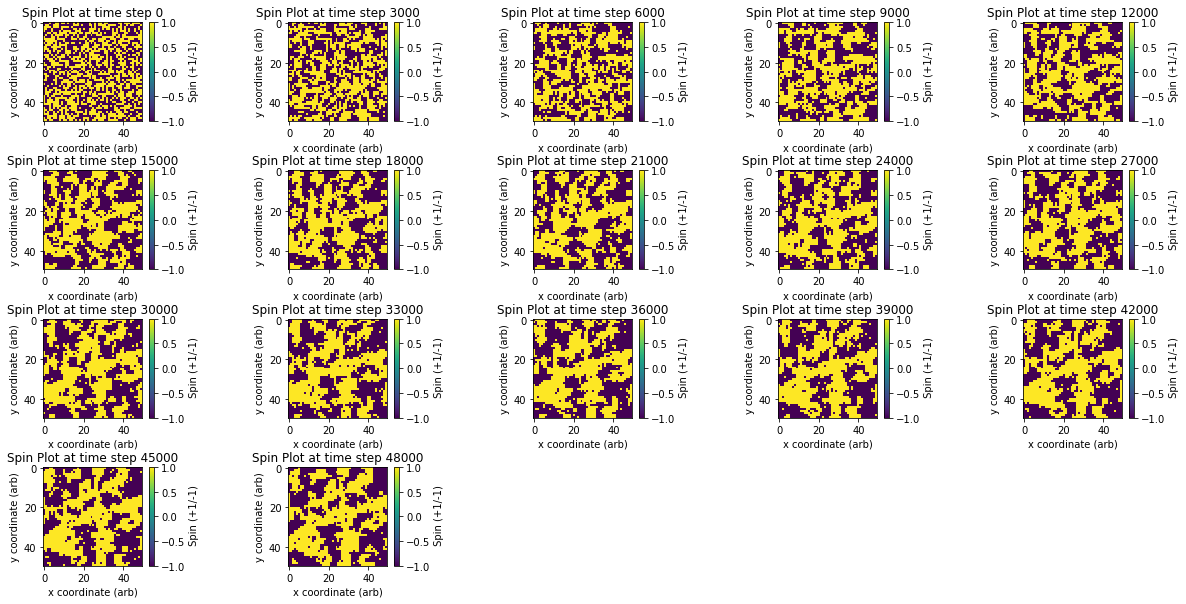

In [6]:
# Number of steps
Nt = 50000

# Initialise spins and J/kT to make cell self contained
J_kT = 0.5
spins= (-1)**np.random.randint( 0, 2, size= (L,L) )

# Calculate sum of neighbouring spins
Sn = np.roll(spins,1,axis=0) + np.roll(spins,-1,axis=0) + np.roll(spins,1,axis=1) + np.roll(spins,-1,axis=1) 

# Defining Energy, Spin mean, and Mean Square spin array
E  = np.zeros(Nt+1)
S  = np.zeros(Nt+1)

# Initialising Energy, Spin mean, and Mean Square spin array
E[0] = -np.sum(spins*(B_kT + J_kT*Sn))
S[0] = np.sum(spins)/np.size(spins)

# Setting up subplots
fig1 = plt.figure(figsize=(20,10))
index = 1

# Main loop
for t in range(Nt):
    
    # Select two points at random to test
    i1, j1 = np.random.randint(L, size = 2)
    i2, j2 = np.random.randint(L, size = 2)
    
    # Test for swap
    dE = Swap(i1,j1,i2,j2)
    
    # Accumulate and store characteristic data
    Sn = np.roll(spins,1,axis=0) + np.roll(spins,-1,axis=0) + np.roll(spins,1,axis=1) + np.roll(spins,-1,axis=1)
    
    E[t+1] = -np.sum(spins*(B_kT + J_kT*Sn))
    S[t+1] = np.sum(spins)/np.size(spins)

    if t%3000==0:
        # Adds subplot through out simulation
        ax = fig1.add_subplot(4,5,index)
        im= ax.imshow(spins)
        
        ax.set_xlabel('x coordinate (arb)')
        ax.set_ylabel('y coordinate (arb)')
        ax.set_title('Spin Plot at time step {0}'.format(t))
    
        cbar1 = plt.colorbar(mappable=im)
        cbar1.set_label(' Spin (+1/-1)')
        index +=1 
    
plt.subplots_adjust(wspace=0.8, hspace=0.5)

### 5. Show total energy
Plot the total energy against time-step, we normalise the total energy (divide it by $N_{spins}\times J/k_BT$.

- We do not need to plot long-range order parameter— the sum over all spins— as this will not changee conciderable over time as the spins are not changing just rearranging in the lattice, this is confirmed by my plot

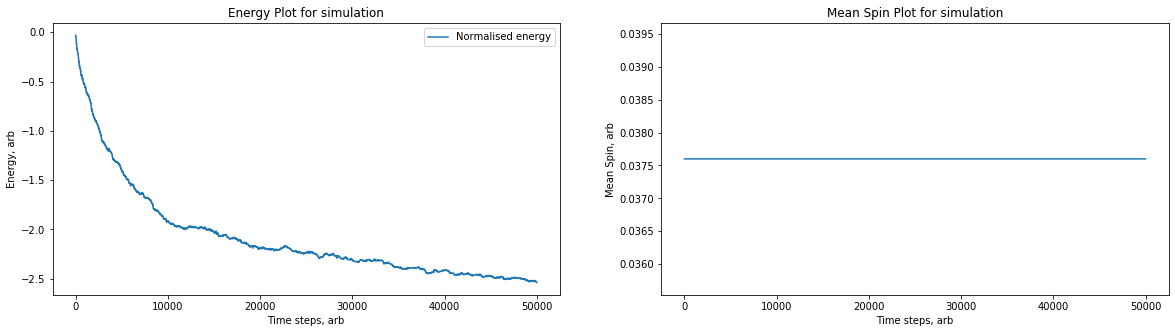

In [7]:
# Set time array and normalise energy
Tt= np.arange(0,Nt+1)
E_norm= E/((L*L)*J_kT)

# Plot energy and mean
fig2, ax = plt.subplots(1,2, figsize=(20,5))

# PLots energy for system
ax[0].plot(Tt, E_norm, label= 'Normalised energy')
ax[0].set_xlabel('Time steps, arb')
ax[0].set_ylabel('Energy, arb')
ax[0].set_title('Energy Plot for simulation')
ax[0].legend()

# Plot mean spin for simulation
ax[1].plot(Tt, S)
ax[1].set_xlabel('Time steps, arb')
ax[1].set_ylabel('Mean Spin, arb')
ax[1].set_title('Mean Spin Plot for simulation')

plt.show()

### 6. Varying J/kT Value
(Note: The variables are not changed, thus graphs above will change if reloaded after code below)

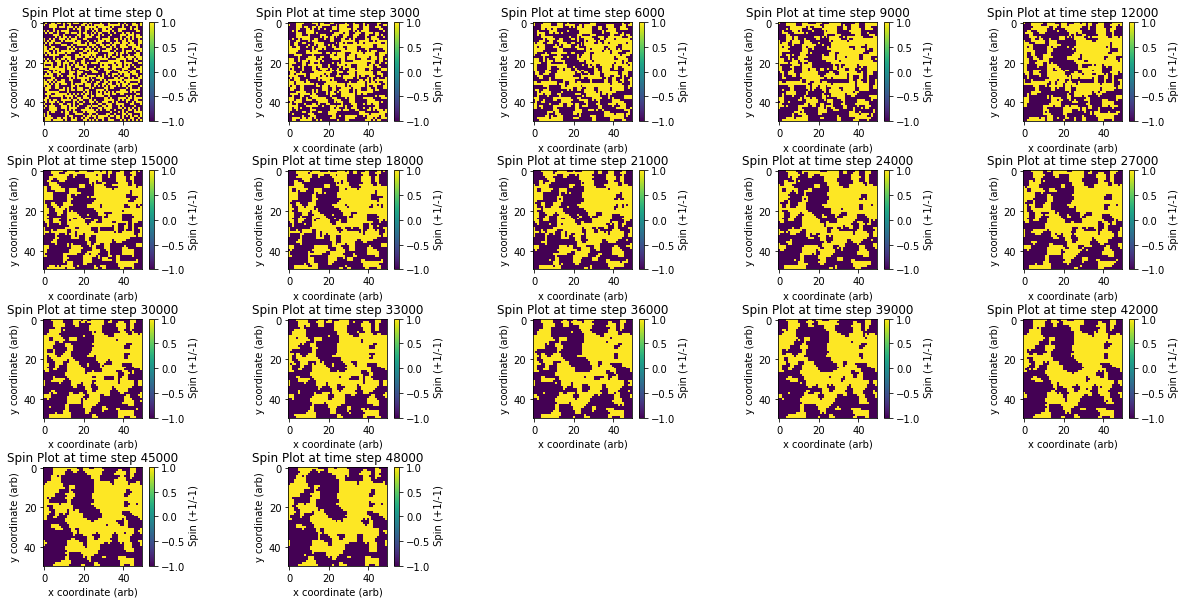

In [8]:
# Repeat simulation
J_kT = 1.0

# Number of steps
Nt = 50000

# Initialise spins to make cell self contained
spins= (-1)**np.random.randint( 0, 2, size= (L,L) )

# Calculate sum of neighbouring spins
Sn = np.roll(spins,1,axis=0) + np.roll(spins,-1,axis=0) + np.roll(spins,1,axis=1) + np.roll(spins,-1,axis=1) 

# Defining Energy array
E  = np.zeros(Nt+1)
E[0] = -np.sum(spins*(B_kT + J_kT*Sn))

# Setting up subplots
fig3 = plt.figure(figsize=(20,10))
index = 1

# Main loop
for t in range(Nt):
    
    # Select two points at random to test
    i1, j1 = np.random.randint(L, size = 2)
    i2, j2 = np.random.randint(L, size = 2)
    
    # Test for swap
    dE = Swap(i1,j1,i2,j2)
    
    # Accumulate and store characteristic data
    Sn = np.roll(spins,1,axis=0) + np.roll(spins,-1,axis=0) + np.roll(spins,1,axis=1) + np.roll(spins,-1,axis=1)
    
    E[t+1] = -np.sum(spins*(B_kT + J_kT*Sn))

    if t%3000==0:
        # Plots subplots
        ax = fig3.add_subplot(4,5,index)
        im= ax.imshow(spins)
        
        ax.set_xlabel('x coordinate (arb)')
        ax.set_ylabel('y coordinate (arb)')
        ax.set_title('Spin Plot at time step {0}'.format(t))
    
        cbar1 = plt.colorbar(mappable=im)
        cbar1.set_label(' Spin (+1/-1)')
        index +=1 
    
plt.subplots_adjust(wspace=0.8, hspace=0.5)

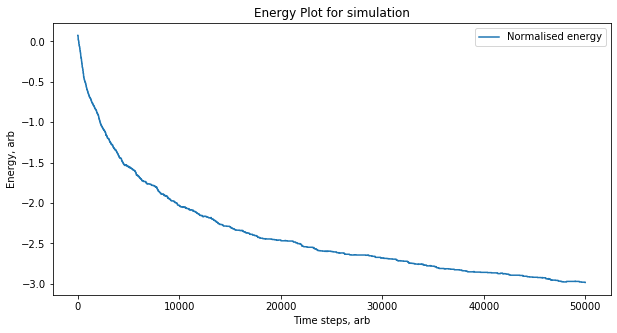

In [9]:
# Plot for alternate J/kT
Tt= np.arange(0,Nt+1)
E_norm= E/(L*L)*J_kT

fig4, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(Tt, E_norm, label= 'Normalised energy')
ax.set_xlabel('Time steps, arb')
ax.set_ylabel('Energy, arb')
ax.set_title('Energy Plot for simulation')
ax.legend()

plt.show()

## Conclusion


-  We see analitically the energy of the system over time converges at some minimum value of Energy, as characterised by ann exponential decay; physically we see this is the result of the formation of magnetic domains such as those in ferromagnetic substances. The formation of these domains are a result of this minimisation as the change in energy will be less when the spins neighboring are aligned; thus as we swap spins when the difference in energy is less than zero this will align similar spins over time as as we randomly sample locations. Physically, this switch of spins, this would be due to quantum exchange interactions from the pauli exclusiion principle and interacion between the atoms wavefunctions.


- We see that for a higher $\frac{J}{k_bT}$ the minimum energy reached is lower, this correlates to larger domain formation and thus would be a more ferromagnetic material. As J increases this correlates to stonger coupling and thus stronger exchange interaction, so more likely for spins to swap. Also this can physically correspond to a lower temperature, this would equally lead to fewer random fluctuations and lower overal energy of the system. We also see this as there is less variation in the energy plot when reaching the minima

## Further code experimentation:

### Animated simulation for J/kT 
- Can see domain formation

49000


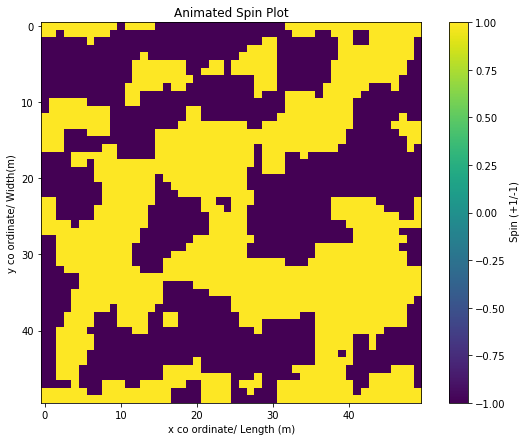

In [9]:
import time
from IPython.display import clear_output

# Repeat simulation
J_kT = 2

# Number of steps
Nt = 50000

# Initialise spins to make cell self contained
spins= (-1)**np.random.randint( 0, 2, size= (L,L) )

# Calculate sum of neighbouring spins
Sn = np.roll(spins,1,axis=0) + np.roll(spins,-1,axis=0) + np.roll(spins,1,axis=1) + np.roll(spins,-1,axis=1) 

# Main loop
for t in range(Nt):
    
    # Select two points at random to test
    i1, j1 = np.random.randint(L, size = 2)
    i2, j2 = np.random.randint(L, size = 2)
    
    # Test for swap
    dE = Swap(i1,j1,i2,j2)

    if t% 1000==0:
        clear_output(wait=True)
        fig, ax= plt.subplots(1, figsize=(10,7))

        im= ax.imshow(spins)
        ax.set_xlabel('x co ordinate/ Length (m)')
        ax.set_ylabel('y co ordinate/ Width(m)')
        ax.set_title('Animated Spin Plot')

        cbar= fig.colorbar(im, ax= ax)
        cbar.set_label(' Spin (+1/-1)')
        
        print(t)
        
        # Pauses and redraws
        plt.draw()
        plt.pause(0.001)  

### Code for testing different J/kT

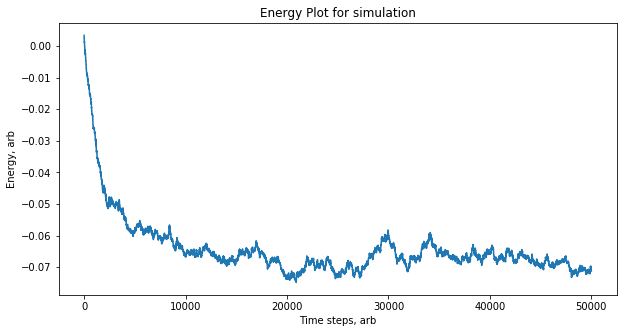

In [10]:
# Repeat simulation 
J_kT = 0.25

# Number of steps
Nt = 50000

# Initialise spins to make cell self contained
spins= (-1)**np.random.randint( 0, 2, size= (L,L) )

# Calculate sum of neighbouring spins
Sn = np.roll(spins,1,axis=0) + np.roll(spins,-1,axis=0) + np.roll(spins,1,axis=1) + np.roll(spins,-1,axis=1) 

# Defining Energy array
E  = np.zeros(Nt+1)
E[0] = -np.sum(spins*(B_kT + J_kT*Sn))

# Main loop
for t in range(Nt):
    
    # Select two points at random to test
    i1, j1 = np.random.randint(L, size = 2)
    i2, j2 = np.random.randint(L, size = 2)
    
    # Test for swap
    dE = Swap(i1,j1,i2,j2)
    
    # Accumulate and store characteristic data
    Sn = np.roll(spins,1,axis=0) + np.roll(spins,-1,axis=0) + np.roll(spins,1,axis=1) + np.roll(spins,-1,axis=1)
    E[t+1] = -np.sum(spins*(B_kT + J_kT*Sn))

# Plot
Tt= np.arange(0,Nt+1)
E_norm= E/(L*L)*J_kT

fig2, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(Tt, E_norm, label= 'Normalised energy')
ax.set_xlabel('Time steps, arb')
ax.set_ylabel('Energy, arb')
ax.set_title('Energy Plot for simulation')
plt.show()

### Comment:
- Using the plot above experimenting with different values we see when $\frac{J}{k_BT}$ is below 0.3 the exchange coupling is too low to form domains, and the energy doesnt reach a stable minima. This was purely visual analysis